In [1]:
import numpy as np
from sklearn.mixture import _gaussian_mixture
from soft_info import estimate_gaussian_covariances_custom

# Monkey-patch the custom covariance calculation function
_gaussian_mixture._estimate_gaussian_covariances_full = estimate_gaussian_covariances_custom

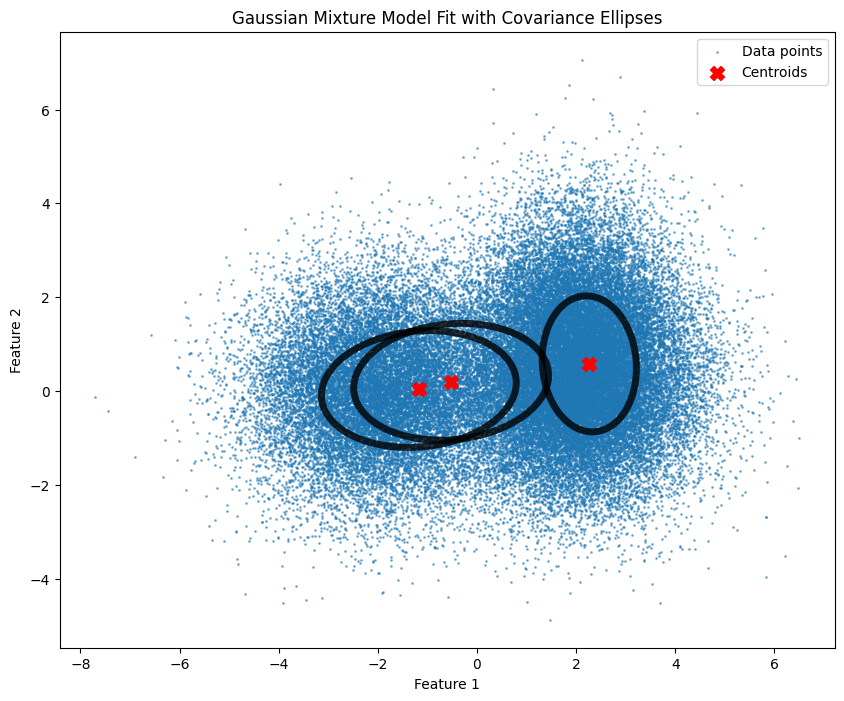

Fitted Covariances:
Covariance of component 1:
[[3.86363374 0.26218482]
 [0.26218482 1.54859101]]
Covariance of component 2:
[[3.86363374 0.26218482]
 [0.26218482 1.54859101]]
Covariance of component 3:
[[ 0.90342149 -0.0873294 ]
 [-0.0873294   2.10095747]]

True Covariances:
Covariance of component 1:
[[1.5 0. ]
 [0.  1.5]]
Covariance of component 2:
[[1.5 0. ]
 [0.  1.5]]
Covariance of component 3:
[[1 0]
 [0 2]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Function to draw ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # 2 std deviations
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)  # 2 std deviations for diagonal covariance
    
    # Ellipse requires 'width' and 'height' as half the size of the total width/height
    # for nsig in range(1, 3):
    for nsig in range(1, 2):
        e = Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs, fill=False, linewidth=5)
        ax.add_patch(e)

# Set random seed for reproducibility
np.random.seed(0)

# Define means and covariances
means = np.array([[-2, 0], [2, 0], [2, 1]])
cov_tied_diag = np.diag([1.5, 1.5])  # Diagonal covariance (tied for component 1 and 2)
cov_random = np.array([[1, 0], [0, 2]])  # Random full covariance for component 3

# Number of samples per component
n_samples = 20000

# Generate data
data1 = np.random.multivariate_normal(means[0], cov_tied_diag, n_samples)
data2 = np.random.multivariate_normal(means[1], cov_tied_diag, n_samples)
data3 = np.random.multivariate_normal(means[2], cov_random, n_samples)

# Combine and shuffle data
X = np.vstack([data1, data2, data3])
np.random.shuffle(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
# gmm = GaussianMixture(n_components=3, covariance_type='tied')
# gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

# Plot
plt.figure(figsize=(10, 8))
ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5, label='Data points')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='X', label='Centroids')

# Draw covariance ellipses
for pos, covar in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(pos, covar, ax=ax, alpha=0.8, color='black')

plt.title('Gaussian Mixture Model Fit with Covariance Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print fitted covariances
print("Fitted Covariances:")
for i, cov in enumerate(gmm.covariances_):
    print(f"Covariance of component {i+1}:")
    print(cov)

print("\nTrue Covariances:")
print(f"Covariance of component 1:")
print(cov_tied_diag)
print(f"Covariance of component 2:")
print(cov_tied_diag)
print(f"Covariance of component 3:")
print(cov_random)


In [ ]:
# Generate random data
np.random.seed(0)
X = np.random.randn(60_000, 2)

# Fit a Gaussian Mixture Model
gmm = _gaussian_mixture.GaussianMixture(n_components=3, covariance_type='full')

# Fit the model
gmm.fit(X)

gmm.covariances_